In [ ]:
#  Copyright (c) Microsoft Corporation.
#  Licensed under the MIT License.

# Introduction

Though users can automatically run the whole Quant research worklfow based on
configurations with Qlib.

Some advanced users usally would like to carefully customize each component to
explore more in Quant.

If you just want a simple example of Qlib.
[Quick start](https://github.com/microsoft/qlib#quick-start) and
[workflow_by_code](https://github.com/microsoft/qlib/blob/main/examples/workflow_by_code.ipynb)
may be a better choice for you.

If you want to know more details about Quant research, this notebook may be a
better place for you to start.

We hope this script could be a tutorial for users who are interested in the
details of Quant.

This notebook tries to demonstrate how can we use Qlib to build components step
by step.


In [1]:
from pprint import pprint
from pathlib import Path
import pandas as pd

In [2]:
MARKET = "csi300"
BENCHMARK = "SH000300"
EXP_NAME = "tutorial_exp"

# Data


## Get data


Users can follow
[the steps](https://github.com/microsoft/qlib/tree/main/scripts#download-qlib-data)
to download data with CLI.

In this example we use the underlying API to automatically download data


In [ ]:
from qlib.tests.data import GetData

GetData().qlib_data(exists_skip=True)

In [10]:
import qlib

qlib.init(provider_uri='../../../data/cn_data/')

[13920:MainThread](2023-06-28 11:17:04,288) INFO - qlib.Initialization - [config.py:417] - default_conf: client.
[13920:MainThread](2023-06-28 11:17:04,291) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[13920:MainThread](2023-06-28 11:17:04,292) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': WindowsPath('D:/projects/qlib/data/cn_data')}


## Inspect raw data


Currently, Qlib support several kinds of data source.


### Calendar


In [4]:
from qlib.data import D

print(D.calendar(start_time="2010-01-01", end_time="2017-12-31", freq="day")[:2])  # calendar data

[Timestamp('2010-01-04 00:00:00') Timestamp('2010-01-05 00:00:00')]


### Basic data


In [11]:
df = D.features(
    ["SH601216"],
    ["$open", "$high", "$low", "$close", "$factor"],
    start_time="2020-05-01",
    end_time="2020-05-31",
)
df

$open     $high      $low    $close   $factor
instrument datetime                                                    
SH601216   2020-05-06  1.400656  1.430144  1.385912  1.420314  0.491458
           2020-05-07  1.420314  1.420314  1.400656  1.405571  0.491458
           2020-05-08  1.410485  1.425229  1.405571  1.410485  0.491458
           2020-05-11  1.415400  1.420314  1.405571  1.410485  0.491458
           2020-05-12  1.410485  1.420314  1.405571  1.410485  0.491458
           2020-05-13  1.410485  1.410485  1.400656  1.410485  0.491458
           2020-05-14  1.405571  1.410485  1.390827  1.390827  0.491458
           2020-05-15  1.395741  1.400656  1.376083  1.380998  0.491458
           2020-05-18  1.390827  1.410485  1.380998  1.390827  0.491458
           2020-05-19  1.395741  1.405571  1.385912  1.390827  0.491458
           2020-05-20  1.415400  1.474375  1.415400  1.454716  0.491458
           2020-05-21  1.464546  1.474375  1.444887  1.454716  0.491458
           2020-05-22  1.454716  1.459631  1.430144  1.454716  0.491458
           2020-05-25  1.469460  1.479289  1.444887  1.469460  0.491458
           2020-05-26  1.463894  1.463894  1.397100  1.419365  0.556614
           2020-05-27  1.408233  1.413799  1.380402  1.385968  0.556614
           2020-05-28  1.374836  1.402666  1.374836  1.385968  0.556614
           2020-05-29  1.385968  1.385968  1.369270  1.380402  0.556614

In [6]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Candlestick(
            x=df.index.get_level_values("datetime"),
            open=df["$open"],
            high=df["$high"],
            low=df["$low"],
            close=df["$close"],
        )
    ]
)
fig.show()

### price adjustment


Maybe you think the price is not what it looks like in real world.

Due to the price adjustment, the price will be different from the real trading
data .


In [7]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Candlestick(
            x=df.index.get_level_values("datetime"),
            open=df["$open"] / df["$factor"],
            high=df["$high"] / df["$factor"],
            low=df["$low"] / df["$factor"],
            close=df["$close"] / df["$factor"],
        )
    ]
)
fig.show()

Please notice the price gap on
[2020-05-26](http://vip.stock.finance.sina.com.cn/corp/view/vISSUE_ShareBonusDetail.php?stockid=601216&type=1&end_date=2020-05-20)

If we want to represent the change of assets value by price, adjust prices are
necesary. By default, Qlib stores the adjusted prices.


### Static universe V.S. dynamic universe


Dynamic universe


In [12]:
# dynamic universe
universe = D.list_instruments(D.instruments("csi100"), start_time="2010-01-01", end_time="2020-12-31")
pprint(universe)

{'SH600000': [(Timestamp('2010-01-01 00:00:00'),
               Timestamp('2020-10-20 00:00:00'))],
 'SH600005': [(Timestamp('2010-01-01 00:00:00'),
               Timestamp('2013-12-13 00:00:00'))],
 'SH600009': [(Timestamp('2018-06-11 00:00:00'),
               Timestamp('2020-10-20 00:00:00')),
              (Timestamp('2010-01-01 00:00:00'),
               Timestamp('2011-06-30 00:00:00'))],
 'SH600010': [(Timestamp('2012-01-04 00:00:00'),
               Timestamp('2020-06-12 00:00:00')),
              (Timestamp('2010-01-01 00:00:00'),
               Timestamp('2010-06-30 00:00:00'))],
 'SH600011': [(Timestamp('2017-12-11 00:00:00'),
               Timestamp('2020-06-12 00:00:00')),
              (Timestamp('2012-07-02 00:00:00'),
               Timestamp('2016-12-09 00:00:00')),
              (Timestamp('2010-01-01 00:00:00'),
               Timestamp('2010-12-31 00:00:00'))],
 'SH600015': [(Timestamp('2010-01-01 00:00:00'),
               Timestamp('2020-10-20 00:00:00'))],
 'SH

In [13]:
print(len(universe))

202


Qlib use dynamic universe by default.

csi100 has around 100 stocks each day(it is not that accurate due to the low
precision of data).


<Axes: xlabel='datetime'>

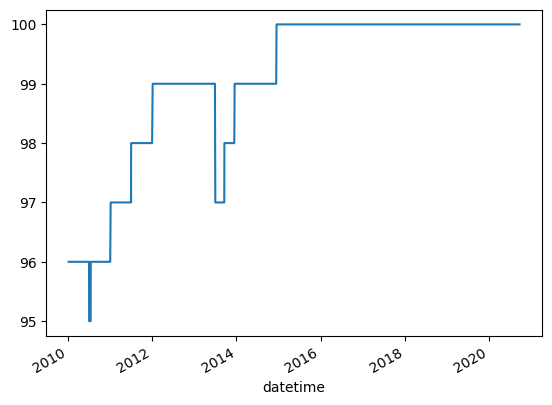

In [14]:
df = D.features(D.instruments("csi100"), ["$close"], start_time="2010-01-01", end_time="2020-12-31")
df.groupby("datetime").size().plot()

### Point-In-Time data


#### download data

NOTE: To run the test faster, we only download the data of two stocks


In [17]:
p = Path("~/.qlib/qlib_data/cn_data/financial").expanduser()

In [ ]:
if not p.exists():
    !cd ../../scripts/data_collector/pit/ && pip install -r requirements.txt
    !cd ../../scripts/data_collector/pit/ && python collector.py download_data --source_dir ~/.qlib/stock_data/source/pit --start 2000-01-01 --end 2020-01-01 --interval quarterly --symbol_regex "^(600519|000725).*"
    !cd ../../scripts/data_collector/pit/ && python collector.py normalize_data --interval quarterly --source_dir ~/.qlib/stock_data/source/pit --normalize_dir ~/.qlib/stock_data/source/pit_normalized
    !cd ../../scripts/ && python dump_pit.py dump --csv_path ~/.qlib/stock_data/source/pit_normalized --qlib_dir ~/.qlib/qlib_data/cn_data --interval quarterly

#### querying data

using `roewa(performanceExpressROEWa,业绩快报净资产收益率ROE-加权)` as an
example

If we want to get fundamental data `in the most recent quarter` daily, we can
use following example.

Maitai release part of its fundamental data on
[2019-07-13](http://www.cninfo.com.cn/new/disclosure/detail?stockCode=600519&announcementId=1206443183&orgId=gssh0600519&announcementTime=2019-07-13)
and release others on
[2019-07-18](http://www.cninfo.com.cn/new/disclosure/detail?stockCode=600519&announcementId=1206456129&orgId=gssh0600519&announcementTime=2019-07-18)


In [15]:
instruments = ["sh600519"]
data = D.features(
    instruments,
    ["P($$roewa_q)"],
    start_time="2019-01-01",
    end_time="2019-07-19",
    freq="day",
)

[13920:MainThread](2023-06-28 11:19:56,193) WARNING - qlib.base - [pit.py:43] - WARN: period data not found for P($$roewa_q)


In [16]:
data.tail(15)

,,P($$roewa_q)
instrument,datetime,


### experss engine


In [18]:
D.features(
    ["sh600519"],
    ["(EMA($close, 12) - EMA($close, 26))/$close - EMA((EMA($close, 12) - EMA($close, 26))/$close, 9)/$close"],
)

(EMA($close, 12) - EMA($close, 26))/$close - EMA((EMA($close, 12) - EMA($close, 26))/$close, 9)/$close
instrument datetime                                                                                                          
sh600519   2001-08-27                                           0.000000                                                     
           2001-08-28                                           0.000370                                                     
           2001-08-29                                           0.000116                                                     
           2001-08-30                                           0.000491                                                     
           2001-08-31                                           0.000507                                                     
...                                                                  ...                                                     
           2020-09-21                                           0.001601                                                     
           2020-09-22                                          -0.000796                                                     
           2020-09-23                                          -0.003449                                                     
           2020-09-24                                          -0.006562                                                     
           2020-09-25                                          -0.008577                                                     

[4517 rows x 1 columns]

## Dataset loading and preprocessing


Some heuristic principles of create features

- make the features comparable between instrumets: remove unit from the
  features.
- try to keep the distribution invariant
- keep the scale of features similar


### data loader

It's interface can be found
[here](https://github.com/microsoft/qlib/blob/main/qlib/data/dataset/loader.py#L24)

QlibDataLoader is an implementation which load data from Qlib's data source


In [19]:
from qlib.data.dataset.loader import QlibDataLoader

In [22]:
qdl = QlibDataLoader(config=(["$close / Ref($close, 9)"], ["RET10"]))

In [23]:
qdl.load(instruments=["sh600519"], start_time="20190101", end_time="20191231")

,,RET10
datetime,instrument,
2019-01-02,sh600519,1.013605
2019-01-03,sh600519,1.021114
2019-01-04,sh600519,1.047868
2019-01-07,sh600519,1.067112
2019-01-08,sh600519,1.064771
...,...,...
2019-12-25,sh600519,0.997098
2019-12-26,sh600519,0.976010
2019-12-27,sh600519,1.013137


### data handler


finance data can't be perfect.

We have to process them before feeding them into Models


In [24]:
df = qdl.load(instruments=["sh600519"], start_time="20190101", end_time="20191231")

In [25]:
df.isna().sum()

RET10    4
dtype: int64

<Axes: ylabel='Frequency'>

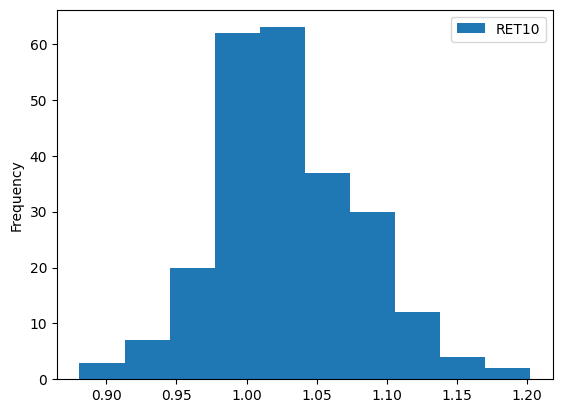

In [26]:
df.plot(kind="hist")

Datahander is responsible for data preprocessing and provides data fetching
interface


In [ ]:
from qlib.data.dataset.handler import DataHandlerLP
from qlib.data.dataset.processor import ZScoreNorm, Fillna

In [ ]:
# NOTE: normally, the training & validation time range will be  `fit_start_time` ， `fit_end_time`
# however，all the components are decomposed, so the training & validation time range is unknown when preprocessing.
dh = DataHandlerLP(
    instruments=["sh600519"],
    start_time="20170101",
    end_time="20191231",
    infer_processors=[
        ZScoreNorm(fit_start_time="20170101", fit_end_time="20181231"),
        Fillna(),
    ],
    data_loader=qdl,
)

In [ ]:
df = dh.fetch()

In [ ]:
df

In [ ]:
df.isna().sum()

In [ ]:
df.plot(kind="hist")

### dataset


#### basic dataset


In [ ]:
from qlib.data.dataset import DatasetH, TSDatasetH

In [ ]:
ds = DatasetH(dh, segments={"train": ("20180101", "20181231"), "valid": ("20190101", "20191231")})

In [ ]:
ds.prepare("train")

In [ ]:
ds.prepare("valid")

#### Time Series Dataset

For different model, the required dataset format will be different.

For example, Qlib provides a Time Series Dataset(TSDatasetH) to help users to
create time-series dataset.


In [ ]:
ds = TSDatasetH(
    step_len=10,
    handler=dh,
    segments={"train": ("20180101", "20181231"), "valid": ("20190101", "20191231")},
)
train_sampler = ds.prepare("train")

In [ ]:
train_sampler

In [ ]:
train_sampler[0]  # Retrieving the first example

In [ ]:
train_sampler["2018-01-08", "sh600519"]  # get the time series by <'timestamp', 'instrument_id'> index

### Off-the-shelf dataset

Qlib integrated some dataset alreadly


In [ ]:
handler_kwargs = {
    "start_time": "2008-01-01",
    "end_time": "2020-08-01",
    "fit_start_time": "2008-01-01",
    "fit_end_time": "2014-12-31",
    "instruments": MARKET,
}
handler_conf = {
    "class": "Alpha158",
    "module_path": "qlib.contrib.data.handler",
    "kwargs": handler_kwargs,
}
pprint(handler_conf)

In [ ]:
from qlib.utils import init_instance_by_config

In [ ]:
hd = init_instance_by_config(handler_conf)

Using config to create instance is a highly frequently used practice in Qlib
(e.g. the
[workflows configurations](https://github.com/microsoft/qlib/blob/main/examples/benchmarks/LightGBM/workflow_config_lightgbm_Alpha158.yaml)
are based on it).

The above configuration is the same as the code below


In [ ]:
from qlib.contrib.data.handler import Alpha158

hd = Alpha158(**handler_kwargs)

This dataset has the same structure as the simple one with 1 column we created
just now.


In [ ]:
df = hd.fetch()

In [ ]:
df

In [ ]:
hd.data_loader

In [ ]:
hd.data_loader.fields

#### some details

The training data may not be the same as the test data.

e.g.

- the training dataset and test dataset use a different fitlering rules, data
  processing


In [ ]:
hd.learn_processors

In [ ]:
hd.infer_processors

In [ ]:
hd.process_type  # appending type

In [ ]:
hd.fetch(col_set="label", data_key=hd.DK_L)

In [ ]:
hd.fetch(col_set="label", data_key=hd.DK_I)

In [ ]:
dataset_conf = {
    "class": "DatasetH",
    "module_path": "qlib.data.dataset",
    "kwargs": {
        "handler": hd,
        "segments": {
            "train": ("2008-01-01", "2014-12-31"),
            "valid": ("2015-01-01", "2016-12-31"),
            "test": ("2017-01-01", "2020-08-01"),
        },
    },
}

In [ ]:
dataset = init_instance_by_config(dataset_conf)

# Model Training & Inference

[Model interface](https://github.com/microsoft/qlib/blob/main/qlib/model/base.py)


In [ ]:
from qlib.workflow import R
from qlib.workflow.record_temp import SignalRecord, PortAnaRecord, SigAnaRecord

In [ ]:
model = init_instance_by_config(
    {
        "class": "LGBModel",
        "module_path": "qlib.contrib.model.gbdt",
        "kwargs": {
            "loss": "mse",
            "colsample_bytree": 0.8879,
            "learning_rate": 0.0421,
            "subsample": 0.8789,
            "lambda_l1": 205.6999,
            "lambda_l2": 580.9768,
            "max_depth": 8,
            "num_leaves": 210,
            "num_threads": 20,
        },
    }
)

In [ ]:
# start exp to train model
with R.start(experiment_name=EXP_NAME):
    model.fit(dataset)
    R.save_objects(trained_model=model)

    rec = R.get_recorder()
    rid = rec.id  # save the record id

    # Inference and saving signal
    sr = SignalRecord(model, dataset, rec)
    sr.generate()

# Evaluation:

- Signal-based
- Portfolio-based: backtest


In [ ]:
###################################
# prediction, backtest & analysis
###################################
port_analysis_config = {
    "executor": {
        "class": "SimulatorExecutor",
        "module_path": "qlib.backtest.executor",
        "kwargs": {
            "time_per_step": "day",
            "generate_portfolio_metrics": True,
        },
    },
    "strategy": {
        "class": "TopkDropoutStrategy",
        "module_path": "qlib.contrib.strategy.signal_strategy",
        "kwargs": {
            "signal": "<PRED>",
            "topk": 50,
            "n_drop": 5,
        },
    },
    "backtest": {
        "start_time": "2017-01-01",
        "end_time": "2020-08-01",
        "account": 100000000,
        "benchmark": BENCHMARK,
        "exchange_kwargs": {
            "freq": "day",
            "limit_threshold": 0.095,
            "deal_price": "close",
            "open_cost": 0.0005,
            "close_cost": 0.0015,
            "min_cost": 5,
        },
    },
}

# backtest and analysis
with R.start(experiment_name=EXP_NAME, recorder_id=rid, resume=True):
    # signal-based analysis
    rec = R.get_recorder()
    sar = SigAnaRecord(rec)
    sar.generate()

    #  portfolio-based analysis: backtest
    par = PortAnaRecord(rec, port_analysis_config, "day")
    par.generate()

# Loading results & Analysis


## loading data

Because Qlib leverage MLflow to save model & data. All the data can be access by
`mlflow ui`


In [ ]:
# load recorder
recorder = R.get_recorder(recorder_id=rid, experiment_name=EXP_NAME)

In [ ]:
# load previous results
pred_df = recorder.load_object("pred.pkl")
report_normal_df = recorder.load_object("portfolio_analysis/report_normal_1day.pkl")
positions = recorder.load_object("portfolio_analysis/positions_normal_1day.pkl")
analysis_df = recorder.load_object("portfolio_analysis/port_analysis_1day.pkl")

In [ ]:
# Previous Model can be loaded. but it is not used.
loaded_model = recorder.load_object("trained_model")
loaded_model

In [ ]:
from qlib.contrib.report import analysis_model, analysis_position

## analysis position


### report


In [ ]:
analysis_position.report_graph(report_normal_df)

### risk analysis


In [ ]:
analysis_position.risk_analysis_graph(analysis_df, report_normal_df)

## analysis model


In [ ]:
label_df = dataset.prepare("test", col_set="label")
label_df.columns = ["label"]

### score IC


In [ ]:
pred_label = pd.concat([label_df, pred_df], axis=1, sort=True).reindex(label_df.index)
analysis_position.score_ic_graph(pred_label)

### model performance


In [ ]:
analysis_model.model_performance_graph(pred_label)